In [50]:
import pandas as pd

info = pd.read_csv('bestsellers with categories.csv')

print(info.head(5))

                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


In [51]:
print('Про скільки книг зберігає дані датасет?')
res = info.shape
print(f'датасет зберігає дані про {res[0]} книг')

Про скільки книг зберігає дані датасет?
датасет зберігає дані про 550 книг


In [52]:
info.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
print('Чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців?')
misses = info.isna().sum()
print(misses)
print('Пропусків не виявлено')

Чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців?
name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64
Пропусків не виявлено


In [53]:
print('Перевірте, які є унікальні значення в колонці genre?')
uniq = info['genre'].unique()
print(f'Унікальні жанри {", ".join([i for i in uniq])}')

Перевірте, які є унікальні значення в колонці genre?
Унікальні жанри Non Fiction, Fiction


Text(0.5, 0, 'Quantity')

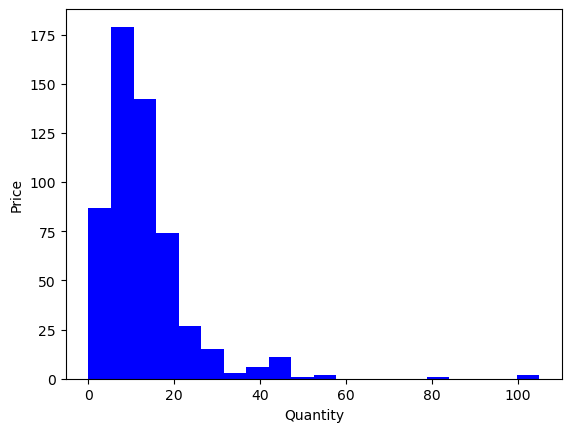

In [54]:
import matplotlib.pyplot as plt

plt.hist(info['price'], bins=20, color='blue', alpha=1)
plt.ylabel('Price')
plt.xlabel('Quantity')
plt.show()

In [55]:
print(f'Min price: {info["price"].min()}')
print(f'Max price: {info["price"].max()}')
print(f'Medium price: {info["price"].mean()}')
print(f'Mediana: {info["price"].median()}')

Min price: 0
Max price: 105
Medium price: 13.1
Mediana: 11.0


In [56]:
print('Який рейтинг у датасеті найвищий?')
print(f'Answer:{info["user_rating"].max()}')


Який рейтинг у датасеті найвищий?
Answer:4.9


In [57]:
print('Скільки книг мають такий рейтинг?')
shape = info.loc[info["user_rating"].idxmax()]
print(f'Answer:{(shape.shape)[0]}')

Скільки книг мають такий рейтинг?
Answer:7


In [58]:
print( 'Яка книга має найбільше відгуків?')
print(f'Answer:{info.loc[info["reviews"].idxmax()]}')

Яка книга має найбільше відгуків?
Answer:name           Where the Crawdads Sing
author                     Delia Owens
user_rating                        4.8
reviews                          87841
price                               15
year                              2019
genre                          Fiction
Name: 534, dtype: object


In [59]:
book = info[info['year']==2015]
print(f'З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? '
      f'Відповідь:{info.loc[book["price"].idxmax()]}')

З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь:name           Publication Manual of the American Psychologic...
author                        American Psychological Association
user_rating                                                  4.5
reviews                                                     8580
price                                                         46
year                                                        2015
genre                                                Non Fiction
Name: 277, dtype: object


In [60]:
print('Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році?')
print(f'Answer:{len(info[(info["year"]==2010) & (info["genre"]== "Fiction")])}')

Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році?
Answer:20


In [61]:
print('Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках?')
print(f'Answer: {len(info[(info["user_rating"] == 4.9)&(info["year"].isin([2010, 2011]))])}')

Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках?
Answer: 1


In [62]:
books = info[(info['year'] == 2015) & (info['price'] < 8)]
print(books.sort_values(by='price', ascending=True))

                                                  name              author  \
507                              To Kill a Mockingbird          Harper Lee   
210                      Laugh-Out-Loud Jokes for Kids         Rob Elliott   
206                         Knock-Knock Jokes for Kids         Rob Elliott   
111                                    First 100 Words        Roger Priddy   
123                               Giraffes Can't Dance       Giles Andreae   
54   Creative Haven Creative Cats Coloring Book (Ad...     Marjorie Sarnat   
63                      Dear Zoo: A Lift-the-Flap Book        Rod Campbell   
89   Dover Creative Haven Art Nouveau Animal Design...         Marty Noble   
478                        The Very Hungry Caterpillar          Eric Carle   
201  Killing Reagan: The Violent Assault That Chang...       Bill O'Reilly   
28                        Baby Touch and Feel: Animals                  DK   
224                                   Love You Forever       Rob

In [63]:
last = books.sort_values(by='price', ascending=True)
print(f"last book : {last.tail(1)}")

last book :                                       name       author  user_rating  reviews  \
253  Old School (Diary of a Wimpy Kid #10)  Jeff Kinney          4.8     6169   

     price  year    genre  
253      7  2015  Fiction  


In [64]:
# PART 3!!!


In [65]:
groups = info.groupby('genre')['price'].agg(['min', 'max'])
print(f'Min price for Non Fiction is {groups.loc["Non Fiction", "min"]}')
print(f'Max price for Non Fiction is {groups.loc["Non Fiction", "max"]}')
print(f'Min price for Fiction is {groups.loc["Fiction", "min"]}')
print(f'Max price for Fiction is {groups.loc["Fiction", "max"]}')


Min price for Non Fiction is 0
Max price for Non Fiction is 105
Min price for Fiction is 0
Max price for Fiction is 82


In [71]:
df = info.groupby('author')['name'].count().reset_index()
df = df.rename(columns={'name':'count'})
print(df)

                         author  count
0              Abraham Verghese      2
1                Adam Gasiewski      1
2                 Adam Mansbach      1
3                     Adir Levy      1
4    Admiral William H. McRaven      1
..                          ...    ...
243             Walter Isaacson      3
244               William Davis      2
245            William P. Young      2
246            Wizards RPG Team      3
247                Zhi Gang Sha      2

[248 rows x 2 columns]


In [73]:
print(f'Якої розмірності вийшла таблиця? Відповідь:{df.shape}')
print(f'Який автор має найбільше книг? Відповідь:{df.loc[df["count"].idxmax()]}')
print(f'Скільки книг цього автора? Відповідь:{df["count"].max()}')

Якої розмірності вийшла таблиця? Відповідь:(248, 2)
Який автор має найбільше книг? Відповідь:author    Jeff Kinney
count              12
Name: 120, dtype: object
Скільки книг цього автора? Відповідь:12


In [89]:
df2 = info.groupby('author')['user_rating'].agg('mean').reset_index()
print(f'У якого автора середній рейтинг мінімальний? Відповідь:{df2.loc[df2["user_rating"].idxmin()]}')
print(f'Який у цього автора середній рейтинг? Відповідь:{df2["user_rating"].min()}')

У якого автора середній рейтинг мінімальний? Відповідь:author         Donna Tartt
user_rating            3.9
Name: 71, dtype: object
Який у цього автора середній рейтинг? Відповідь:3.9


In [99]:
# При виконанні методу concat колонка author подвоїлась, тому вирішив використати мердж
df3 = df2.merge(df, on='author', how='left')
df3 = df3.sort_values(by=['count', 'user_rating'], ascending=False)

In [100]:
print(df3.iloc[0])

author         Jeff Kinney
user_rating            4.8
count                   12
Name: 120, dtype: object


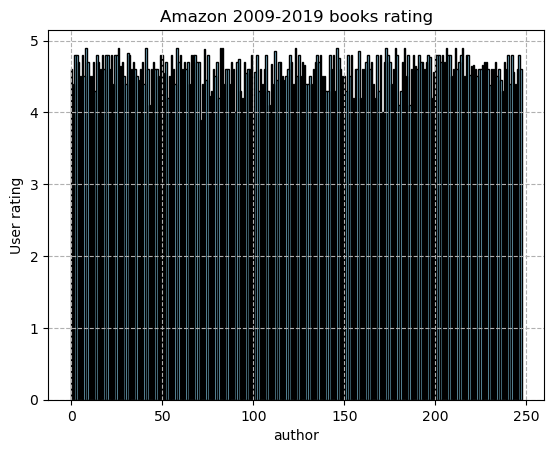

In [102]:
data = df3['user_rating']
fig, ax = plt.subplots()
ax.bar(df3.index, data, color='skyblue', edgecolor='black')
ax.set_xlabel('author')
ax.set_ylabel('User rating')
plt.title('Amazon 2009-2019 books rating')
ax.grid(True, linestyle='--', alpha=1)
plt.show()

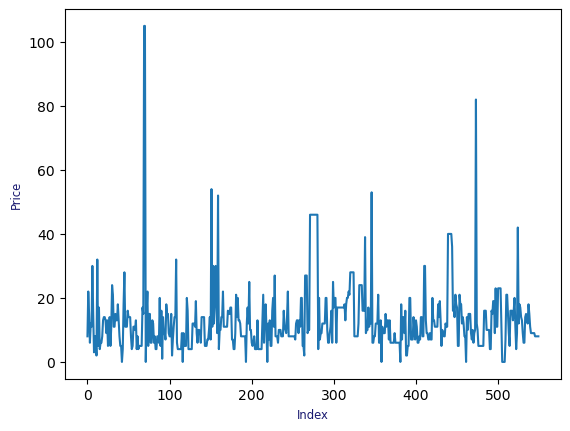

In [107]:
plt.plot(info['price'])
plt.xlabel('Index', fontsize='small', color='midnightblue')
plt.ylabel('Price', fontsize='small', color='midnightblue')
plt.title('Books price', fontsize=15)
plt.show()

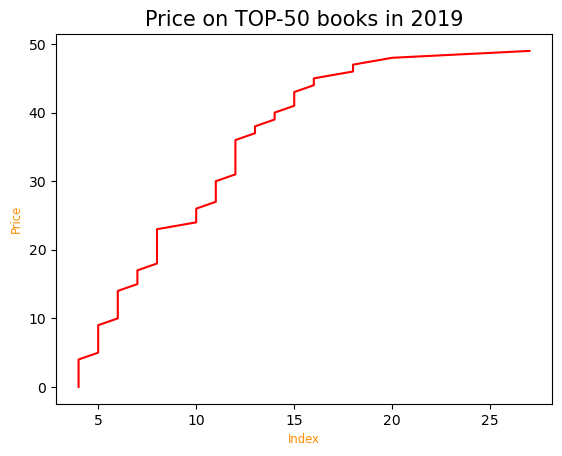

In [116]:
data = info[info['year'] == 2019].sort_values(by='price', ascending=True)
x = data['price']
y = list(range(len(data)))
plt.plot(x,y, color='red')
plt.xlabel('Index', fontsize='small', color='darkorange')
plt.ylabel('Price', fontsize='small', color='darkorange')
plt.title('Price on TOP-50 books in 2019', fontsize=15)
plt.show()